In [1]:
import json

# Load checkpoint data
with open('checkpoint.json', 'r') as file:
    data = json.load(file)

In [2]:
import numpy as np
import pandas as pd

# Range of thresholds
thresholds = np.arange(0.0, 1.05, 0.05)

# Initialize list to store metrics for each threshold
metrics = []

# Iterate over each threshold
for threshold in thresholds:
    correct_predictions = 0
    correct_contexts = 0
    
    for item in data["data"]:
        if item["similarity_score"] >= threshold:
            correct_predictions += 1
        if item["context_found"] == True:
            correct_contexts += 1
    
    total_questions = len(data["data"])
    accuracy = correct_predictions / total_questions
    recall = correct_contexts / total_questions
    
    # Store metrics
    metrics.append({'Threshold': threshold, 'Accuracy': accuracy, 'Recall': recall})

In [3]:
# Convert metrics into pandas dataframe
df_metrics = pd.DataFrame(metrics)

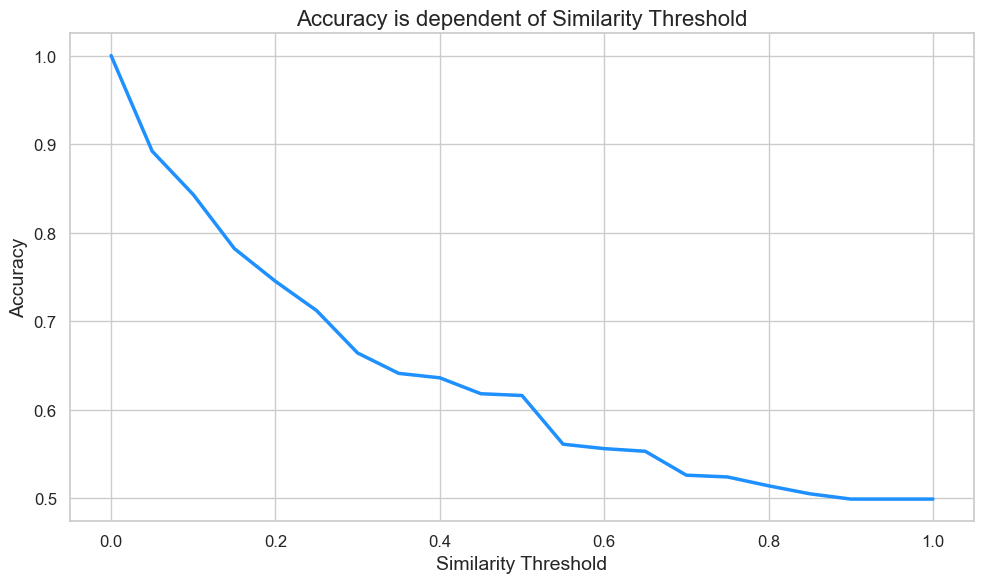

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot theme
sns.set_theme(style="whitegrid", palette="muted")

# Specify figure size
plt.figure(figsize=(10, 6))

# Plot accuracy
sns.lineplot(x='Threshold', y='Accuracy', data=df_metrics, color='dodgerblue', lw=2.5)

# Labels
plt.xlabel('Similarity Threshold', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy is dependent of Similarity Threshold', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# Save plot to file
plt.savefig('accuracy_variation.png', dpi=300)

# Display plot
plt.show()